# Cats And Dogs Identification using CNN with softmax and loss='sparse_categorical_crossentropy' -AlexNet
**

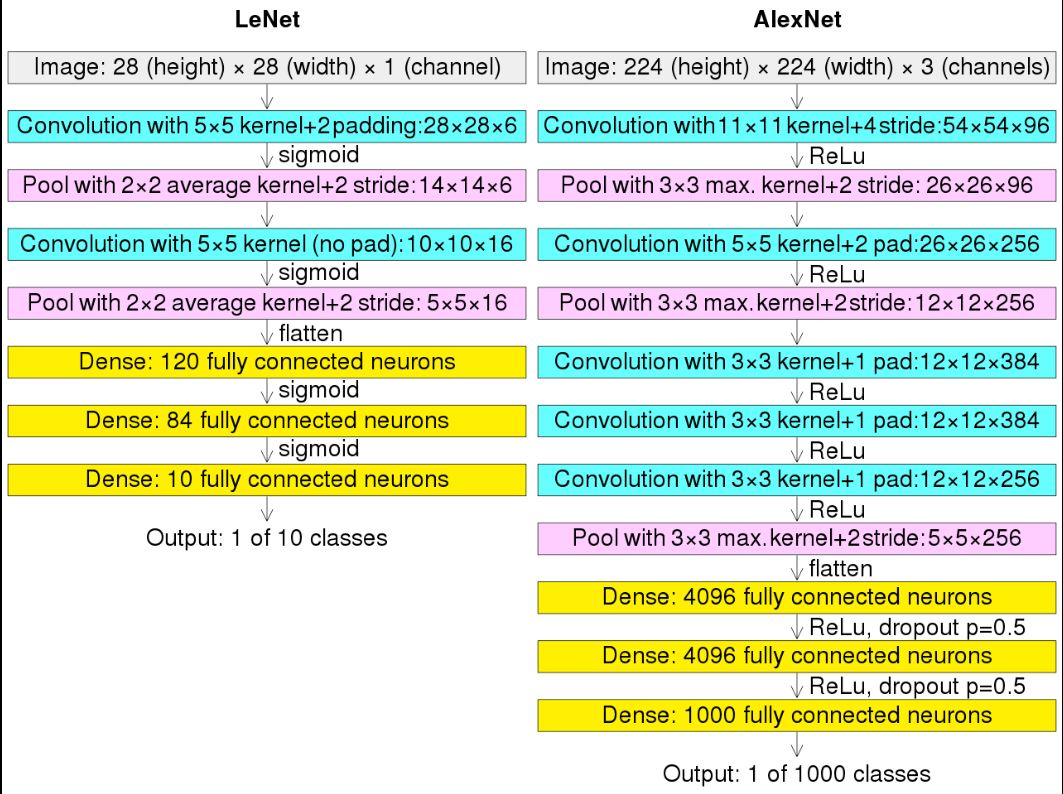

In [1]:
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = Sequential()

# Conv 01 Layer
model.add(Convolution2D(96, 11,padding = "valid",strides =(4, 4),input_shape = (224, 224, 3),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())



# Conv 02 Layer
model.add(Convolution2D(256, 5,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Conv 03 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())


# Conv 04 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())



# Conv 05 Layer
model.add(Convolution2D(256, 3,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (3, 3),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Flatten Layer
model.add(Flatten())


# Dense 01
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 02
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 03
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Final Layer
model.add(Dense(3, activation="softmax"))

2022-12-08 13:49:49.215208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:49:49.216266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:49:49.521631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:49:49.522565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 13:49:49.523376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [4]:
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, decay = 0.005), 
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [5]:
datasets_directory = "../input/CatsAndDogs/dataset/"

In [6]:
batch_size = 128

In [7]:
train_dataGenerator = ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2, 
                                        zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2, 
                                         fill_mode="nearest"
                                        )

validation_dataGenerator = ImageDataGenerator(rescale = 1./255)

In [8]:
# Load the datasets from the folder
trainDatasets = train_dataGenerator.flow_from_directory(datasets_directory+"/training_set", 
                                                       target_size=(224, 224),
                                                       batch_size=batch_size, 
                                                       class_mode='binary')

validationDatasets = validation_dataGenerator.flow_from_directory(datasets_directory+"/test_set", 
                                                       target_size=(224, 224),
                                                       batch_size=batch_size, 
                                                       class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
classInformation = trainDatasets.class_indices
print("Class Information: {}".format(classInformation))
classes = list(classInformation)
print("Class Names: {}".format(classes))

Class Information: {'cats': 0, 'dogs': 1}
Class Names: ['cats', 'dogs']


In [10]:
classSamplesT = trainDatasets.samples
print("Training Data Samples: {}".format(classSamplesT))
classSamplesV = validationDatasets.samples
print("Test Data Samples: {}".format(classSamplesV))

Training Data Samples: 8000
Test Data Samples: 2000


In [11]:
weghtPath = "best_weights_9.hdf5"
checkPoint = ModelCheckpoint(weghtPath, monitor="val_acc", verbose = 1, save_best_only = True, save_weghts_only = True, mode = "max")
callBacksList = [checkPoint]

In [12]:
history = model.fit(trainDatasets, 
                   steps_per_epoch = classSamplesT//batch_size, 
                   validation_data=validationDatasets,
                   epochs=20, 
                   validation_steps=classSamplesV//batch_size, 
                   callbacks=callBacksList)

2022-12-08 13:50:02.629583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-12-08 13:50:08.556096: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


62/62 [==============================] - 188s 3s/step - loss: 1.3919 - accuracy: 0.4196 - val_loss: 0.9114 - val_accuracy: 0.5214
Epoch 2/20
62/62 [==============================] - 142s 2s/step - loss: 1.1614 - accuracy: 0.4859 - val_loss: 0.8483 - val_accuracy: 0.5354
Epoch 3/20
62/62 [==============================] - 144s 2s/step - loss: 1.0503 - accuracy: 0.5202 - val_loss: 0.7971 - val_accuracy: 0.5880
Epoch 4/20
62/62 [==============================] - 142s 2s/step - loss: 0.9720 - accuracy: 0.5533 - val_loss: 0.7811 - val_accuracy: 0.5906
Epoch 5/20
62/62 [==============================] - 141s 2s/step - loss: 0.9138 - accuracy: 0.5761 - val_loss: 0.7452 - val_accuracy: 0.6464
Epoch 6/20
62/62 [==============================] - 141s 2s/step - loss: 0.8785 - accuracy: 0.5819 - val_loss: 0.7357 - val_accuracy: 0.6427
Epoch 7/20
62/62 [==============================] - 141s 2s/step - loss: 0.8480 - accuracy: 0.5979 - val_loss: 0.7357 - val_accuracy: 0.6344
Epoch 8/20
62/62 [======